<img src='https://cdn.worldofbuzz.com/wp-content/uploads/2018/02/new-hijab-regulations-in-aceh-causes-airasia-to-schedule-only-male-flight-attendants-world-of-buzz-4.png?strip=all&lossy=1&quality=92&ssl=1'>

<h2><b>FLIGHT PRICE PREDICTION</b></h2>

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Performed by <b>Danila Pechenev, 21.Б15-мм group</b>

## Step 1 | Environment setup

### ✈️ Step 1.1 | Import libraries

In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install termcolor
# !pip install scikit-learn
# !pip install optuna-integration
# !pip install lightgbm
# !pip install catboost
# !pip install xgboost

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings
from IPython.display import clear_output

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, \
                             RandomForestRegressor, \
                             AdaBoostRegressor, \
                             GradientBoostingRegressor, \
                             HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import StratifiedKFold, \
                                    GridSearchCV, \
                                    cross_val_score, \
                                    train_test_split, \
                                    cross_validate
from sklearn.utils import resample

import random
RANDOM_STATE=42
random.seed(RANDOM_STATE)

import optuna
import time

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### ✈️ Step 1.2 | Configure libraries

In [4]:
sns.set_style('darkgrid') # Seaborn style
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature
warnings.filterwarnings('ignore') # Ignore warnings

### ✈️ Step 1.3 | Unzip dataset

In [5]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset.csv             


## Step 2 | Data exploration

### ✈️ Step 2.1 | Import data

In [6]:
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### ✈️ Step 2.2 | Investigate features

### FEATURES EXPLANATION
1. **Airline** - the name of the airline company. [CATEGORICAL]
2. **Flight** - the plane's flight code. [CATEGORICAL]
3. **Source city** - the city from which the flight takes off. [CATEGORICAL]
4. **Departure time** - a derived feature created by grouping time periods into bins. It stores information about the departure time. [CATEGORICAL]
5. **Stops** - the number of stops between the source and destination cities. [CATEGORICAL]
6. **Arrival time** - a derived feature created by grouping time intervals into bins. It keeps information about the arrival time. [CATEGORICAL]
7. **Destination city** - the city where the flight ends. [CATEGORICAL]
8. **Class** - seat class (Business or Economy). [CATEGORICAL]
9. **Duration** - overall amount of time taken to travel between cities in hours. [CONTINUOUS]
10. **Days left** - a derived characteristic that is calculated by subtracting the trip date by the booking date. [CONTINUOUS]
11. **Price** - target variable stores information of the ticket price. [CONTINUOUS]



### ✈️ Step 2.3 | Get basic information about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
data.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

✅ There are no null values, no actions required

➡️ 'Unnamed: 0' column duplicates the indexes, so we can delete it

In [9]:
data.drop(columns='Unnamed: 0', inplace=True)

➡️ Rename 'class' name to 'seat_class', since *class* is Python reserved name.

In [10]:
data.rename(columns={'class': 'seat_class'}, inplace=True)

In [11]:
# Now we can refer to the column like this
data.seat_class

0          Economy
1          Economy
2          Economy
3          Economy
4          Economy
            ...   
300148    Business
300149    Business
300150    Business
300151    Business
300152    Business
Name: seat_class, Length: 300153, dtype: object

## Step 3 | Data visualization

### ✈️ Step 3.1 | Build plots

In [12]:
# Print all columns and their indexes
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : seat_class
8 : duration
9 : days_left
10 : price


In [13]:
def analyze_cat_column(column_name):
    values_count_result = data[column_name].value_counts()
    print(f"Count values of {column_name} column:")
    print(values_count_result)
    print("--------------------------------------------------")

    print("Percentage distribution of values:")
    labels = values_count_result.index
    colors = sns.color_palette()
    plt.pie(values_count_result, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

In [14]:
MAX_X_VALUE = 50
def analyze_cont_column(column_name, target_column="price", hue="seat_class"):
    fig, ax = plt.subplots(2, 1, figsize=(8, 10))
    plt.tight_layout()
    sns.lineplot(x=column_name, y=target_column, data=data, ax=ax[0], hue=hue).set_xticks(np.arange(0, MAX_X_VALUE + 1, 5))
    sns.boxplot(data=data, x=column_name, ax=ax[1]).set_xticks(np.arange(0, MAX_X_VALUE + 1, 2))
    plt.show()

#### **airline** column

Count values of airline column:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
--------------------------------------------------
Percentage distribution of values:


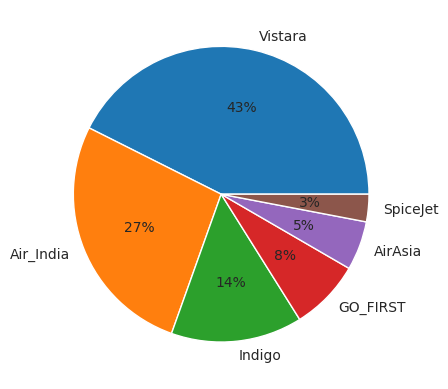

In [15]:
analyze_cat_column("airline")

✅ There are 6 unique values of **airline** column

* Vistara operates slightly less than half of all flights from the dataset
* Air India operates slightly more than quarter of all flights from the dataset
* Other airlines operate 30% of flights from the dataset

#### **flight** column

In [16]:
len(data.flight.value_counts())

1561

✅ There are 1561 unique values of **flight** column, so we don't build charts for it

➡️ Flight number may be redundant, since the flight number can be determined by knowing the departure and arrival cities, the airline and the flight time. That is why we will drop it

In [17]:
data.drop(columns='flight', inplace=True)

#### **source_city** column

Count values of source_city column:
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
--------------------------------------------------
Percentage distribution of values:


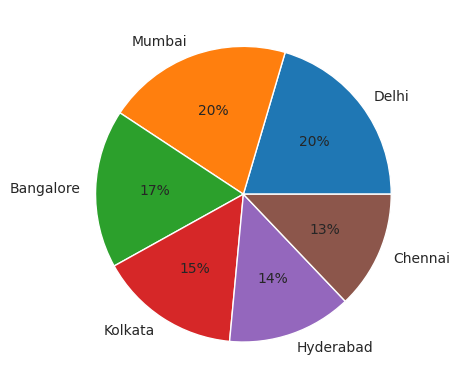

In [18]:
analyze_cat_column("source_city")

✅ There are 6 unique values of **source_city** column

*   The number of flights from all source cities is roughly similar

#### **departure_time** column

Count values of departure_time column:
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
--------------------------------------------------
Percentage distribution of values:


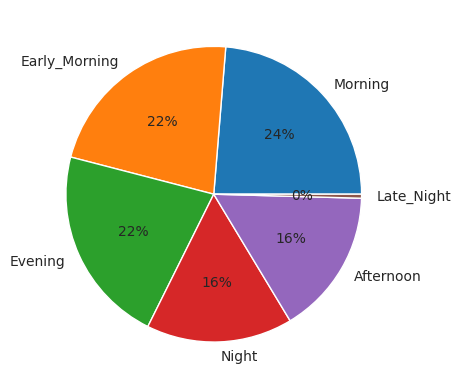

In [19]:
analyze_cat_column("departure_time")

✅ There are 6 unique values of **departure_time** column

* Aside from **Late_Night**, the frequency of the remaining categories is approximately equal
* Very few flights are operated late at night

#### **stops** column

Count values of stops column:
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64
--------------------------------------------------
Percentage distribution of values:


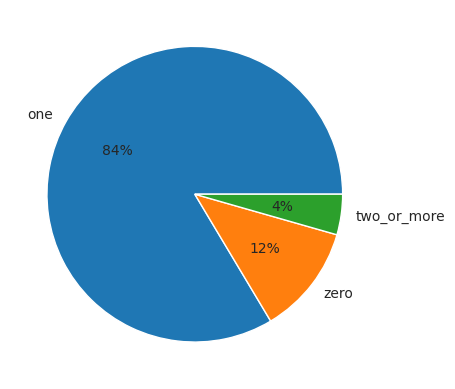

In [20]:
analyze_cat_column("stops")

✅ There are 3 unique values of **stops** column

 - Most flights have 1 stop

#### **arrival_time** column

Count values of arrival_time column:
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
--------------------------------------------------
Percentage distribution of values:


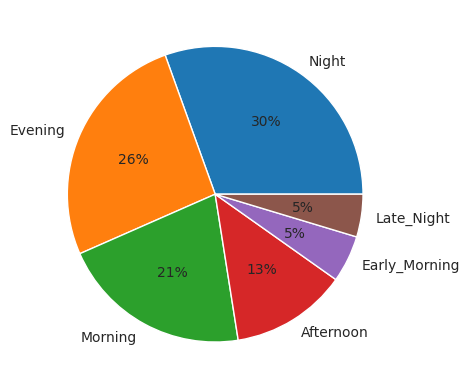

In [21]:
analyze_cat_column("arrival_time")

✅ There are 6 unique values of **arrival_time** column. Values are the same as in **departure_time** column

#### **destination_city** column

Count values of destination_city column:
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64
--------------------------------------------------
Percentage distribution of values:


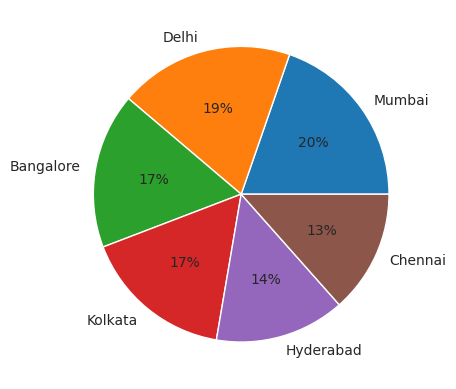

In [22]:
analyze_cat_column("destination_city")

✅ There are 6 unique values of **destination_city** column. Values are the same as in **source_city** column

#### **seat_class** column

Count values of seat_class column:
Economy     206666
Business     93487
Name: seat_class, dtype: int64
--------------------------------------------------
Percentage distribution of values:


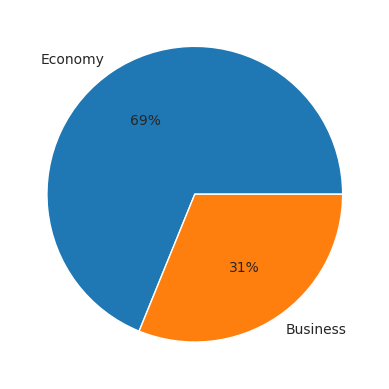

In [23]:
analyze_cat_column("seat_class")

✅ There are 2 unique values of **seat_class** column

* Obviously, business class tickets are more expensive

#### **duration** column

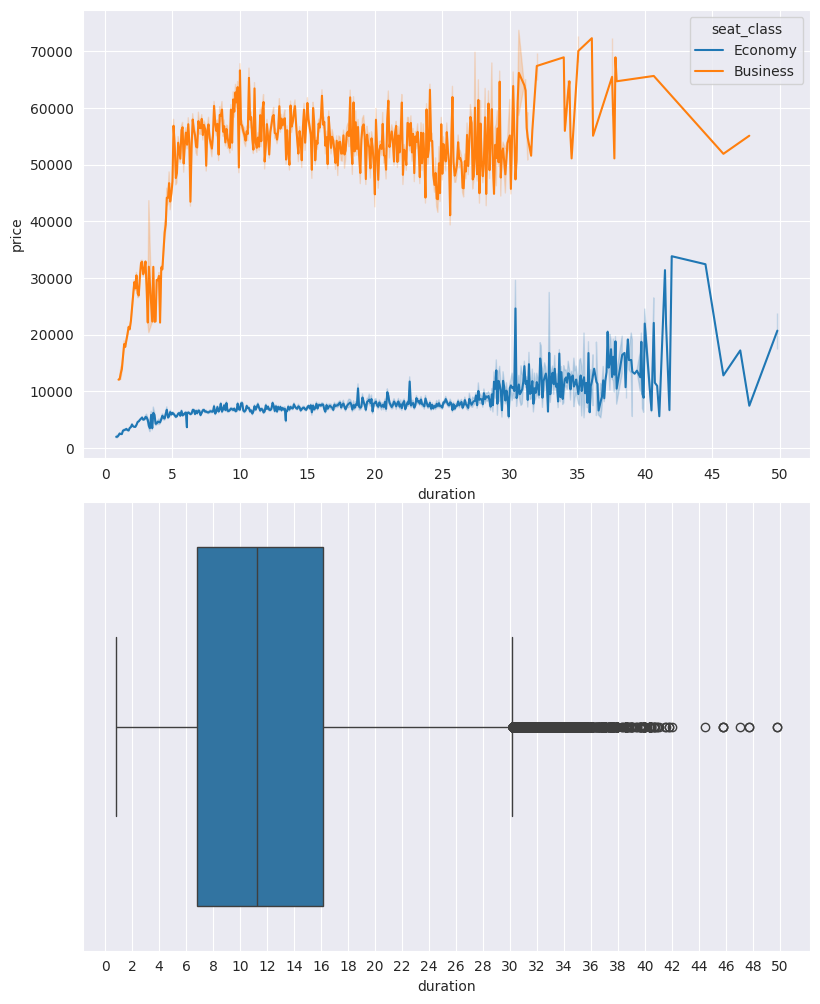

In [24]:
analyze_cont_column("duration")

Business class:
* from 1 to 5 hours, the price increases sharply
* for durations more than 5 hours, the price ranges from ~45000 to ~60000

Economy class:
* the price increases smoothly throughout almost the entire chart

#### **days_left** column

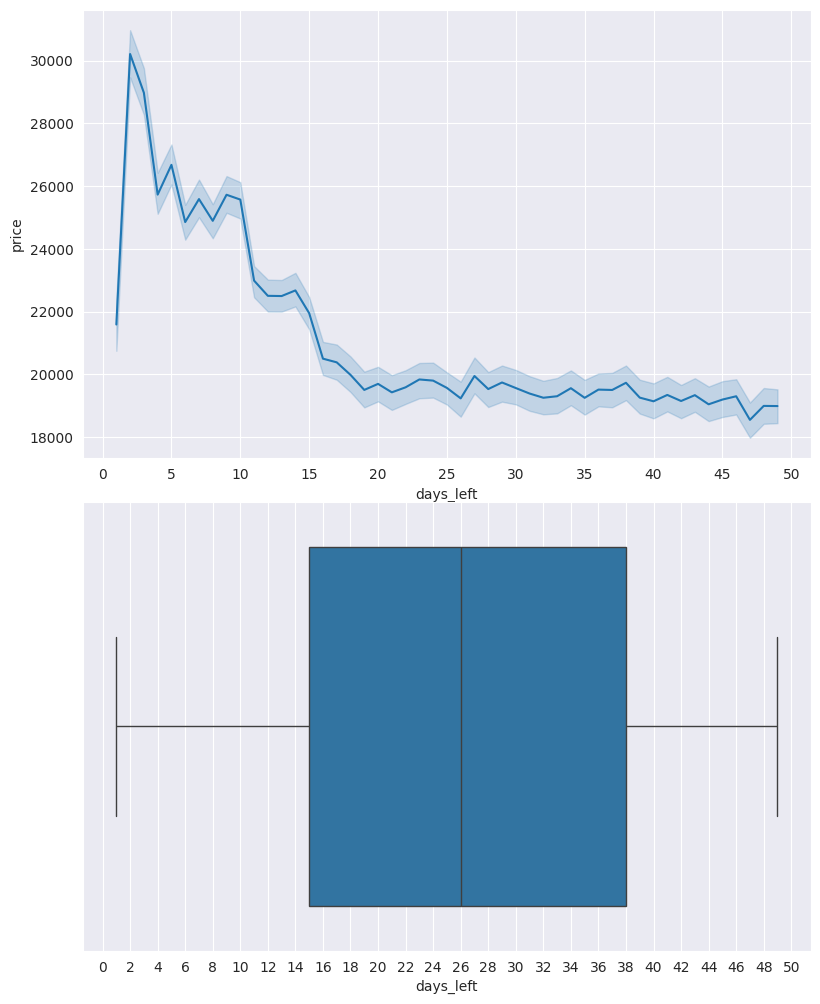

In [25]:
analyze_cont_column("days_left", hue=None)

* In general, the earlier you book tickets, the less you will pay

#### **price** column (target)

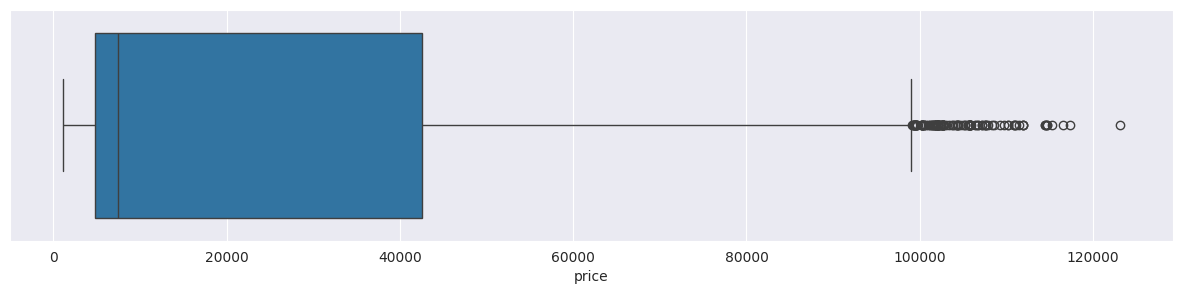

In [26]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='price')
plt.show()

## Step 4 | Data preprocessing

### ✈️ Step 4.1 | Replace categorical values by numbers

In [27]:
airline_rule = {
    'Vistara'   : 0,
    'Air_India' : 1,
    'Indigo'    : 2,
    'GO_FIRST'  : 3,
    'AirAsia'   : 4,
    'SpiceJet'  : 5
}

data.airline = data.airline.replace(airline_rule)

In [28]:
city_rule = {
    'Delhi'     : 0,
    'Mumbai'    : 1,
    'Bangalore' : 2,
    'Kolkata'   : 3,
    'Hyderabad' : 4,
    'Chennai'   : 5
}

data.source_city = data.source_city.replace(city_rule)
data.destination_city = data.destination_city.replace(city_rule)

In [29]:
time_rule = {
    'Morning'       : 0,
    'Early_Morning' : 1,
    'Evening'       : 2,
    'Night'         : 3,
    'Afternoon'     : 4,
    'Late_Night'    : 5
}

data.departure_time = data.departure_time.replace(time_rule)
data.arrival_time = data.arrival_time.replace(time_rule)

In [30]:
stops_rule = {
    'one'         : 0,
    'zero'        : 1,
    'two_or_more' : 2
}

data.stops = data.stops.replace(stops_rule)

In [31]:
seat_class_rule = {
    'Economy'  : 0,
    'Business' : 1
}

data.seat_class = data.seat_class.replace(seat_class_rule)

In [32]:
data.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,seat_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,1.153072,2.201487,1.794901,0.208480,2.229656,2.274104,0.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.437956,1.682563,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,11.250000,26.000000,7425.000000
75%,2.000000,4.000000,3.000000,0.000000,3.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


### ✈️ Step 4.2 | Build correlation matrix

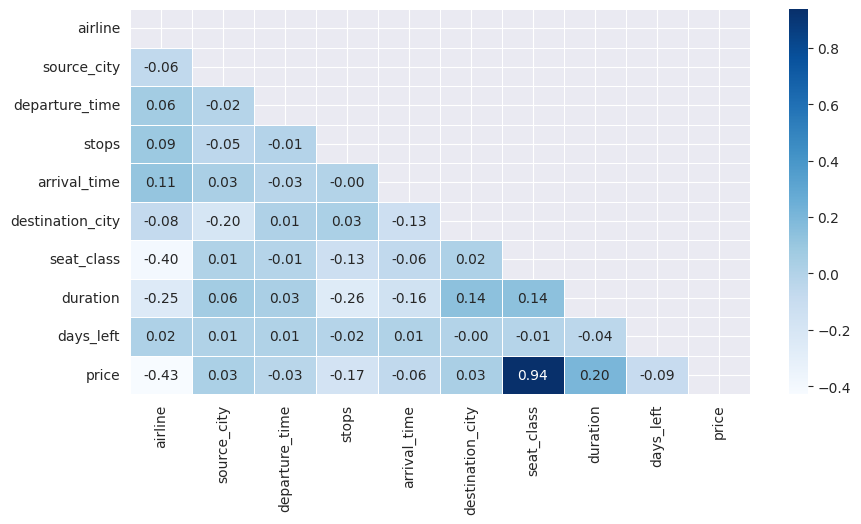

In [33]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

✅ It is obvious that **seat_class** is the most relevant feature to **price**. Correlation matrix reflects that

### ✈️ Step 4.3 | Separate X and y

In [34]:
X = data.drop(columns='price')
y = data.price

✅ Since we will train models based on trees, there is no need for normalization

## Step 5 | Implementation of custom ensemble models

In [35]:
class MyModel:
    def get_params(self, deep=False):
        return self._params

    def set_params(self, **params):
        for key, value in params.items():
            self._params[key] = value
        return self

### ✈️ Step 5.1 | Random Forest

In [36]:
class MyRandomForestRegressor(MyModel):
    def __init__(self,
            n_estimators=100,
            max_depth=None,
            max_features=1.0,
            max_samples=1.0,
            random_state=None
        ):
        self._params = {
            "n_estimators": n_estimators,
            "max_depth"   : max_depth,
            "max_features": max_features,
            "random_state": random_state,
            "max_samples" : max_samples
        }

    def fit(self, X, y):
        self._trees = []
        self._features = []
        columns = list(X.columns)
        bootstrap_samples = round(self._params["max_samples"] * X.shape[0])
        max_features = round(self._params["max_features"] * len(columns))
        for i in range(self._params["n_estimators"]):
            X_i, y_i = resample(X, y, n_samples=bootstrap_samples, random_state=self._params["random_state"])
            features = random.sample(columns, max_features)
            self._features.append(features)
            X_i = X_i[features]

            tree = DecisionTreeRegressor(
                max_depth=self._params["max_depth"],
                random_state=self._params["random_state"]
            )

            tree.fit(X_i, y_i)
            self._trees.append(tree)

    def predict(self, X):
        sum = np.zeros(X.shape[0])
        for i in range(self._params["n_estimators"]):
            tree = self._trees[i]
            features = self._features[i]
            sum += tree.predict(X[features])
        return sum / self._params["n_estimators"]

### ✈️ Step 5.2 | AdaBoost

In [37]:
class MyAdaBoost(MyModel):
    def __init__(self,
            n_estimators=100,
            max_depth=3,
            random_state=None,
        ):
        self._params = {
            "n_estimators": n_estimators,
            "max_depth"   : max_depth,
            "random_state": random_state
        }

    def fit(self, X, y):
        self._trees = []
        self._alphas = []
        samples_number = X.shape[0]
        weights = np.full(samples_number, 1 / samples_number)
        for i in range(self._params["n_estimators"]):
            X_i, y_i = resample(X, y, n_samples=samples_number, random_state=self._params["random_state"])

            tree = DecisionTreeRegressor(
                max_depth=self._params["max_depth"],
                random_state=self._params["random_state"]
            )
            tree.fit(X_i, y_i, weights)
            self._trees.append(tree)

            error = 1 - tree.score(X, y, weights)
            alpha = np.log((1 - error) / error) / 2
            self._alphas.append(alpha)
            y_pred = tree.predict(X)
            weights = weights * np.exp(-alpha * (abs((y - y_pred) / y) < (1 / (i + 1))))
            weights_sum = sum(weights)
            weights = weights / weights_sum
        self._alphas /= sum(self._alphas)

    def predict(self, X):
        result = np.zeros(X.shape[0])
        for i in range(self._params["n_estimators"]):
            tree = self._trees[i]
            alpha = self._alphas[i]
            result += alpha * tree.predict(X)
        return result

## Step 6 | Model training & evaluation

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=RANDOM_STATE)

In [39]:
model_results = pd.DataFrame({"model": [], "training time, s": [], "r2": [], "mae": []})
model_results

,model,"training time, s",r2,mae


In [40]:
def optuna_train(estimator, params):
    study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(seed=RANDOM_STATE), direction="maximize")

    model = optuna.integration.OptunaSearchCV(
        estimator,
        params,
        scoring="r2",
        n_jobs=4,
        random_state=RANDOM_STATE,
        study=study
    )

    results = cross_validate(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=StratifiedKFold(shuffle=True, random_state=RANDOM_STATE),
        scoring=["r2", "neg_mean_absolute_error"],
        n_jobs=4,
        return_estimator=True
    )

    clear_output()
    for fold, estimator in enumerate(results["estimator"], start=1):
        print(f"Best params for fold #{fold}:", estimator.best_params_)
    print()

    results = pd.DataFrame(results).rename(
        columns={"fit_time": "fit time, s",
                 "score_time": "score time, s",
                 "test_r2": "r2",
                 "test_neg_mean_absolute_error": "mae"}
    )
    results["mae"] = -results["mae"]
    results.drop(columns=["estimator"], inplace=True)
    results.index.name = "fold"
    return results

### ✈️ Step 6.1 | MyRandomForestRegressor

In [41]:
%%time
optuna_train(
    estimator=MyRandomForestRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "max_depth": optuna.distributions.CategoricalDistribution([5, 10, 15]),
        "max_features": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1.0]),
        "max_samples": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1.0]),
    }
)

Best params for fold #1: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #2: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #3: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #4: {'n_estimators': 3, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #5: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}

CPU times: user 1.2 s, sys: 187 ms, total: 1.39 s
Wall time: 33.4 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,24.508722,0.053874,0.971410,1860.886760
1,23.976752,0.053865,0.971673,1832.853311
2,24.656189,0.050766,0.971545,1872.271061
3,18.332062,0.031732,0.972290,1848.179811
4,13.202491,0.033613,0.972562,1818.330690


In [42]:
# Train model on X_train with the best parameters
start_time = time.time()
model = MyRandomForestRegressor(
    n_estimators=5,
    max_depth=15,
    max_features=1.0,
    max_samples=1.0,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "MyRandomForestRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

### ✈️ Step 6.2 | MyAdaBoost

In [43]:
%%time
optuna_train(
    estimator=MyAdaBoost(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "max_depth": optuna.distributions.CategoricalDistribution([5, 10, 15]),
    }
)

Best params for fold #1: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #2: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #3: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #4: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #5: {'n_estimators': 10, 'max_depth': 15}

CPU times: user 2.1 s, sys: 454 ms, total: 2.55 s
Wall time: 2min 20s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,106.786185,0.094009,0.975992,1767.131293
1,107.014202,0.103639,0.976374,1764.905955
2,107.099502,0.089797,0.975723,1798.013943
3,108.344262,0.074659,0.976361,1791.477827
4,32.320284,0.061894,0.976894,1735.962072


In [44]:
# Train model on X_train with the best parameters
start_time = time.time()
model = MyAdaBoost(
    n_estimators=10,
    max_depth=15,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "MyAdaBoost",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

### ✈️ Step 6.3 | BaggingRegressor (sklearn)

In [45]:
%%time
optuna_train(
    estimator=BaggingRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "max_samples": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1]),
        "max_features": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1]),
    }
)

Best params for fold #1: {'n_estimators': 3, 'max_samples': 0.666, 'max_features': 0.666}
Best params for fold #2: {'n_estimators': 3, 'max_samples': 0.666, 'max_features': 0.666}
Best params for fold #3: {'n_estimators': 3, 'max_samples': 0.666, 'max_features': 0.666}
Best params for fold #4: {'n_estimators': 3, 'max_samples': 0.666, 'max_features': 0.666}
Best params for fold #5: {'n_estimators': 3, 'max_samples': 0.666, 'max_features': 0.666}

CPU times: user 1.03 s, sys: 59.7 ms, total: 1.09 s
Wall time: 11.4 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,8.030215,0.040057,0.872752,5869.177448
1,7.853992,0.035175,0.872110,5900.931882
2,7.029658,0.029337,0.873525,5867.533475
3,7.834213,0.037772,0.873085,5866.114008
4,3.309936,0.024299,0.874512,5849.089898


In [46]:
# Train model on X_train with the best parameters
start_time = time.time()
model = BaggingRegressor(
    n_estimators=3,
    max_samples=0.666,
    max_features=0.666,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "BaggingRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

### ✈️ Step 6.4 | RandomForestRegressor (sklearn)

In [47]:
%%time
optuna_train(
    estimator=RandomForestRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "max_depth": optuna.distributions.CategoricalDistribution([5, 10, 15]),
        "max_features": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1.0]),
        "max_samples": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1.0]),
    }
)

Best params for fold #1: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #2: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #3: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #4: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}
Best params for fold #5: {'n_estimators': 5, 'max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0}

CPU times: user 1.19 s, sys: 150 ms, total: 1.34 s
Wall time: 32 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,21.290838,0.031305,0.978331,1685.343670
1,21.401689,0.036014,0.978376,1689.613918
2,21.951402,0.030856,0.978366,1695.559268
3,21.553319,0.043051,0.978616,1688.646473
4,9.674643,0.032211,0.978636,1675.182566


In [48]:
# Train model on X_train with the best parameters
start_time = time.time()
model = RandomForestRegressor(
    n_estimators=5,
    max_depth=15,
    max_features=1.0,
    max_samples=1.0,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "RandomForestRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

### ✈️ Step 6.5 | AdaBoostRegressor (sklearn)

In [49]:
%%time
optuna_train(
    estimator=AdaBoostRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
    }
)

Best params for fold #1: {'n_estimators': 10}
Best params for fold #2: {'n_estimators': 7}
Best params for fold #3: {'n_estimators': 7}
Best params for fold #4: {'n_estimators': 10}
Best params for fold #5: {'n_estimators': 7}

CPU times: user 1.39 s, sys: 144 ms, total: 1.53 s
Wall time: 45.5 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,34.526391,0.043319,0.935518,3566.880402
1,33.510767,0.025864,0.934730,3576.613635
2,34.353867,0.050433,0.936764,3535.371037
3,35.194270,0.045581,0.936595,3561.612042
4,10.931407,0.013000,0.936469,3531.804927


In [50]:
# Train model on X_train with the best parameters
start_time = time.time()
model = AdaBoostRegressor(
    n_estimators=7,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "AdaBoostRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

### ✈️ Step 6.6 | GradientBoostingRegressor (sklearn)

In [51]:
%%time
optuna_train(
    estimator=GradientBoostingRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "max_depth": optuna.distributions.CategoricalDistribution([5, 10, 15]),
        "max_features": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1.0])
    }
)

Best params for fold #1: {'n_estimators': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #2: {'n_estimators': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #3: {'n_estimators': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #4: {'n_estimators': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #5: {'n_estimators': 10, 'max_depth': 5, 'max_features': 0.333}

CPU times: user 1.4 s, sys: 147 ms, total: 1.55 s
Wall time: 52.5 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,38.208567,0.022149,0.749681,9070.754897
1,34.977699,0.016664,0.747862,9103.041919
2,35.588257,0.024933,0.748882,9099.369102
3,35.010654,0.019215,0.748640,9086.869980
4,16.547014,0.012489,0.771908,8606.603460


In [52]:
# Train model on X_train with the best parameters
start_time = time.time()
model = GradientBoostingRegressor(
    n_estimators=10,
    max_depth=5,
    max_features=0.333,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "GradientBoostingRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

### ✈️ Step 6.7 | HistGradientBoostingRegressor (sklearn)

In [53]:
%%time
optuna_train(
    estimator=HistGradientBoostingRegressor(random_state=RANDOM_STATE),
    params={
        "max_iter": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "max_depth": optuna.distributions.CategoricalDistribution([5, 10, 15]),
        "max_features": optuna.distributions.CategoricalDistribution([0.333, 0.666, 1.0])
    }
)

Best params for fold #1: {'max_iter': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #2: {'max_iter': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #3: {'max_iter': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #4: {'max_iter': 10, 'max_depth': 5, 'max_features': 0.333}
Best params for fold #5: {'max_iter': 10, 'max_depth': 5, 'max_features': 0.333}

CPU times: user 997 ms, sys: 45.8 ms, total: 1.04 s
Wall time: 17.6 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,12.954146,0.021242,0.801334,8054.836682
1,13.288812,0.020211,0.818842,7640.265506
2,12.943253,0.022087,0.819792,7617.223144
3,13.296215,0.018312,0.819478,7613.244950
4,3.615853,0.008941,0.822616,7549.106772


In [54]:
# Train model on X_train with the best parameters
start_time = time.time()
model = HistGradientBoostingRegressor(
    max_iter=10,
    max_depth=5,
    max_features=0.333,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "HistGradientBoostingRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

### ✈️ Step 6.8 | LGBMRegressor (lightgmb)

In [55]:
%%time
optuna_train(
    estimator=LGBMRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([10, 20]),
        "max_depth": optuna.distributions.CategoricalDistribution([10, 15]),
    }
)

Best params for fold #1: {'n_estimators': 20, 'max_depth': 15}
Best params for fold #2: {'n_estimators': 20, 'max_depth': 15}
Best params for fold #3: {'n_estimators': 20, 'max_depth': 15}
Best params for fold #4: {'n_estimators': 20, 'max_depth': 15}
Best params for fold #5: {'n_estimators': 20, 'max_depth': 15}

CPU times: user 2.03 s, sys: 194 ms, total: 2.23 s
Wall time: 3min 29s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,150.887416,0.045246,0.944630,3716.228968
1,208.396362,0.007058,0.943618,3748.482631
2,206.077742,0.050030,0.943971,3746.773515
3,160.967279,0.056562,0.943942,3735.495828
4,56.959779,0.029520,0.945020,3712.803714


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.450630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 168086, number of used features: 9
[LightGBM] [Info] Start training from score 20893.789013
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly se

In [56]:
# Train model on X_train with the best parameters
start_time = time.time()
model = LGBMRegressor(
    n_estimators=20,
    max_depth=15,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "LGBMRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)
clear_output()

### ✈️ Step 6.9 | CatBoostRegressor (catboost)

In [57]:
%%time
optuna_train(
    estimator=CatBoostRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "depth": optuna.distributions.CategoricalDistribution([5, 10, 15]),
    }
)

Best params for fold #1: {'n_estimators': 10, 'depth': 15}
Best params for fold #2: {'n_estimators': 7, 'depth': 15}
Best params for fold #3: {'n_estimators': 10, 'depth': 15}
Best params for fold #4: {'n_estimators': 10, 'depth': 15}
Best params for fold #5: {'n_estimators': 10, 'depth': 15}

CPU times: user 1.3 s, sys: 235 ms, total: 1.53 s
Wall time: 47.1 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,38.869985,0.016752,0.971574,2165.465221
1,32.406690,0.011389,0.967185,2371.970550
2,40.196264,0.064460,0.970789,2201.416012
3,39.611168,0.029180,0.971361,2170.058439
4,12.854692,0.004394,0.972037,2158.881316


In [58]:
# Train model on X_train with the best parameters
start_time = time.time()
model = CatBoostRegressor(
    n_estimators=10,
    depth=15,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "CatBoostRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

Learning rate set to 0.5
0:	learn: 12530.1766157	total: 58.9ms	remaining: 530ms
1:	learn: 7596.1806981	total: 219ms	remaining: 877ms
2:	learn: 5452.1081683	total: 355ms	remaining: 828ms
3:	learn: 4622.7237620	total: 488ms	remaining: 732ms
4:	learn: 4288.7938719	total: 604ms	remaining: 604ms
5:	learn: 4135.0494354	total: 724ms	remaining: 482ms
6:	learn: 3984.6813515	total: 840ms	remaining: 360ms
7:	learn: 3848.4197894	total: 962ms	remaining: 241ms
8:	learn: 3793.2327587	total: 1.09s	remaining: 122ms
9:	learn: 3693.7919377	total: 1.22s	remaining: 0us


### ✈️ Step 6.10 | XGBRegressor (xgboost)

In [59]:
%%time
optuna_train(
    estimator=XGBRegressor(random_state=RANDOM_STATE),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 7, 10, 15]),
        "max_depth": optuna.distributions.CategoricalDistribution([5, 10, 15]),
    }
)

Best params for fold #1: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #2: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #3: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #4: {'n_estimators': 10, 'max_depth': 15}
Best params for fold #5: {'n_estimators': 10, 'max_depth': 15}

CPU times: user 1.23 s, sys: 265 ms, total: 1.49 s
Wall time: 32.6 s


,"fit time, s","score time, s",r2,mae
fold,,,,
0,25.355837,0.097289,0.981586,1663.480552
1,23.289982,0.046144,0.981325,1676.413670
2,23.118047,0.042236,0.981865,1661.576575
3,21.686968,0.047541,0.981794,1656.076586
4,8.273033,0.023586,0.982130,1655.035250


In [60]:
# Train model on X_train with the best parameters
start_time = time.time()
model = XGBRegressor(
    n_estimators=10,
    max_depth=15,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test model in X_test and store results
y_pred = model.predict(X_test)
model_results = model_results.append({
    "model": "XGBRegressor",
    "training time, s": training_time,
    "r2": r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred)
}, ignore_index = True)

## Step 7 | Results

### ✈️ Step 7.1 | Compare results and draw conclusions

In [61]:
model_results

,model,"training time, s",r2,mae
0,MyRandomForestRegressor,1.973871,0.971655,1840.258940
1,MyAdaBoost,4.513666,0.976803,1736.393518
2,BaggingRegressor,0.463723,0.873812,5840.502212
3,RandomForestRegressor,1.319498,0.978024,1679.605273
4,AdaBoostRegressor,1.154104,0.935746,3509.534527
5,GradientBoostingRegressor,0.481531,0.749644,9056.560708
6,HistGradientBoostingRegressor,0.207547,0.819884,7597.044768
7,LGBMRegressor,0.698168,0.943923,3713.905647
8,CatBoostRegressor,1.311264,0.971405,2139.233830
9,XGBRegressor,0.643344,0.981908,1638.517265


Conclusions:
* XGBRegressor has the best scores
* GradientBoostingRegressor has the worst scores
* MyAdaBoost requires the most time for training
* HistGradientBoostingRegressor requires the least amount of time for training

If you have any questions do not hesitate to contact me: danilapechenev@gmail.com

**Danila Pechenev, 21.Б15-мм group, St. Petersburg State University**